MACHINE LEARNING MODELS

In [10]:
import os
import numpy as np
from PIL import Image
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to preprocess images and extract LBP features
def preprocess_and_extract_features(image_paths):
    features = []
    for image_path in image_paths:
        image = Image.open(image_path).convert("L")  # Convert to grayscale
        image = image.resize((64, 64))
        image = np.array(image)

        lbp_radius = 3
        lbp_points = 24
        lbp_image = local_binary_pattern(image, lbp_points, lbp_radius, method='uniform')

        # Calculate LBP histogram
        hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, lbp_points + 3), range=(0, lbp_points + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-6)  # Normalize

        features.append(hist)

    return np.array(features)

# Function to evaluate a model
def evaluate_model(model, X_val, y_val, X_test, y_test):
    val_accuracy = accuracy_score(y_val, model.predict(X_val))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    return val_accuracy, test_accuracy

# Path to the image folder
image_folder = "C:/Users/user/Desktop/sati/data"  # Replace with your dataset path

# Lists to store image paths and labels
image_paths = []
labels = []

# Collect image paths and labels
for class_name in os.listdir(image_folder):
    class_path = os.path.join(image_folder, class_name)
    if os.path.isdir(class_path):
        image_paths.extend([os.path.join(class_path, image_name) for image_name in os.listdir(class_path)])
        labels.extend([class_name] * len(os.listdir(class_path)))

# Extract features from images and preprocess them
features = preprocess_and_extract_features(image_paths)

# Split dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 1: Machine Learning Models (SVM, DT, RF)
def train_ml_model(model, param_grid, X_train, y_train, X_val, y_val, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    val_accuracy, test_accuracy = evaluate_model(best_model, X_val, y_val, X_test, y_test)
    return best_model, val_accuracy, test_accuracy

# SVM
svm_model, svm_val_accuracy, svm_test_accuracy = train_ml_model(
    SVC(),
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1]},
    X_train, y_train, X_val, y_val, X_test, y_test
)
print("SVM Validation Accuracy:", svm_val_accuracy)
print("SVM Test Accuracy:", svm_test_accuracy)

# Decision Tree (DT)
dt_model, dt_val_accuracy, dt_test_accuracy = train_ml_model(
    DecisionTreeClassifier(),
    {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    X_train, y_train, X_val, y_val, X_test, y_test
)
print("Decision Tree Validation Accuracy:", dt_val_accuracy)
print("Decision Tree Test Accuracy:", dt_test_accuracy)

# Random Forest (RF)
rf_model, rf_val_accuracy, rf_test_accuracy = train_ml_model(
    RandomForestClassifier(),
    {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    X_train, y_train, X_val, y_val, X_test, y_test
)
print("Random Forest Validation Accuracy:", rf_val_accuracy)
print("Random Forest Test Accuracy:", rf_test_accuracy)


SVM Validation Accuracy: 0.8102108768035516
SVM Test Accuracy: 0.7870452528837621
Decision Tree Validation Accuracy: 0.8512763596004439
Decision Tree Test Accuracy: 0.8553682342502218
Random Forest Validation Accuracy: 0.9100998890122086
Random Forest Test Accuracy: 0.8944099378881988


VISUALISE ACCURACY

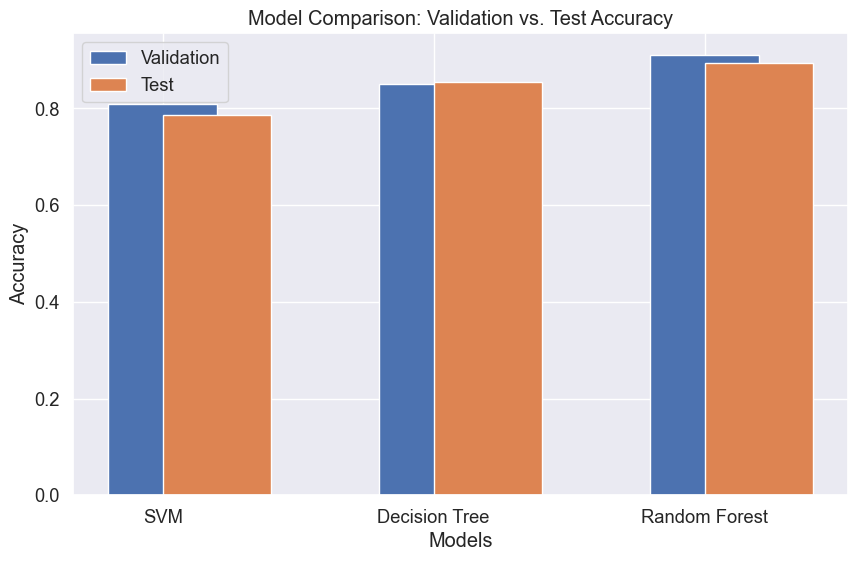

In [44]:
import matplotlib.pyplot as plt

# Model names
models = ['SVM', 'Decision Tree', 'Random Forest']

# Validation accuracy scores
validation_scores = [0.8102, 0.8513, 0.9101]

# Test accuracy scores
test_scores = [0.7870, 0.8554, 0.8944]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, validation_scores, width=0.4, label='Validation', align='center')
plt.bar(models, test_scores, width=0.4, label='Test', align='edge')

# Add labels and legend
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Validation vs. Test Accuracy')
plt.legend()

# Display the chart
plt.show()


CLASSIFICATION REPORT FOR THE MACHINE LEARNING MODELS

In [11]:
from sklearn.metrics import classification_report

# SVM
svm_pred = svm_model.predict(X_test)
svm_report = classification_report(y_test, svm_pred, target_names=np.unique(labels))
print("SVM Classification Report:\n", svm_report)

# Decision Tree
dt_pred = dt_model.predict(X_test)
dt_report = classification_report(y_test, dt_pred, target_names=np.unique(labels))
print("Decision Tree Classification Report:\n", dt_report)

# Random Forest
rf_pred = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_pred, target_names=np.unique(labels))
print("Random Forest Classification Report:\n", rf_report)


SVM Classification Report:
               precision    recall  f1-score   support

      cloudy       0.94      0.79      0.86       328
      desert       0.60      0.50      0.55       227
  green_area       0.87      0.92      0.90       284
       water       0.70      0.88      0.78       288

    accuracy                           0.79      1127
   macro avg       0.78      0.77      0.77      1127
weighted avg       0.79      0.79      0.78      1127

Decision Tree Classification Report:
               precision    recall  f1-score   support

      cloudy       0.88      0.89      0.88       328
      desert       0.77      0.81      0.79       227
  green_area       0.91      0.92      0.91       284
       water       0.84      0.79      0.82       288

    accuracy                           0.86      1127
   macro avg       0.85      0.85      0.85      1127
weighted avg       0.86      0.86      0.86      1127

Random Forest Classification Report:
               precision   

CONFUSION MATRIX FOR MACHINE LEARNING MODELS

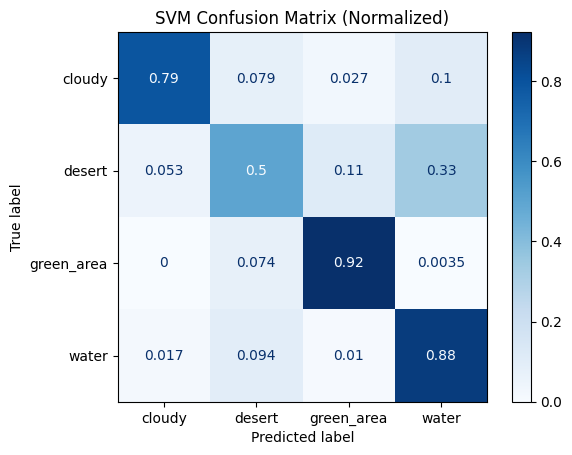

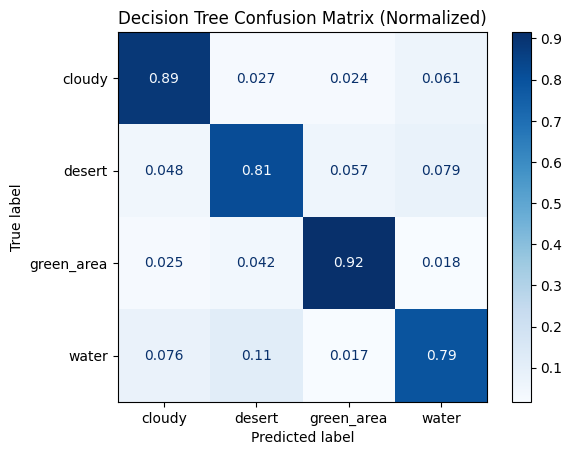

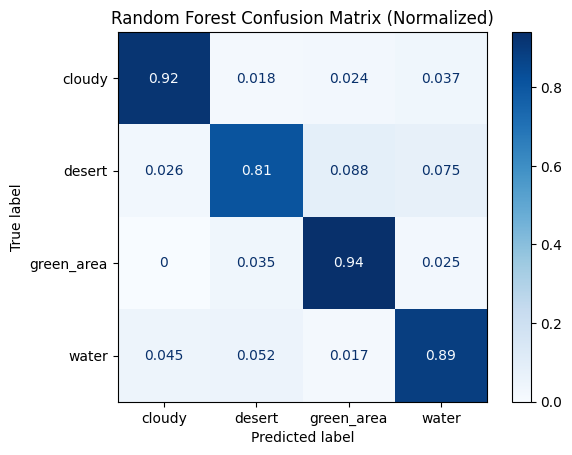

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot and visualize the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, class_names):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Visualize confusion matrices for each classifier

# SVM
svm_pred = svm_model.predict(X_test)
class_names = np.unique(y_test)
plot_confusion_matrix(y_test, svm_pred, 'SVM Confusion Matrix (Normalized)', class_names)

# Decision Tree
dt_pred = dt_model.predict(X_test)
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree Confusion Matrix (Normalized)', class_names)

# Random Forest
rf_pred = rf_model.predict(X_test)
plot_confusion_matrix(y_test, rf_pred, 'Random Forest Confusion Matrix (Normalized)', class_names)

ROC AUC PLOT FOR MACHINE LEARNING

#Since the models are multi-class, we still visualized their performance using ROC-AUC (Receiver Operating Characteristic - 
#Area Under the Curve) for each class. 
#when dealing with multi-class classification, we considered one-vs-rest or one-vs-one strategies for ROC-AUC visualization.

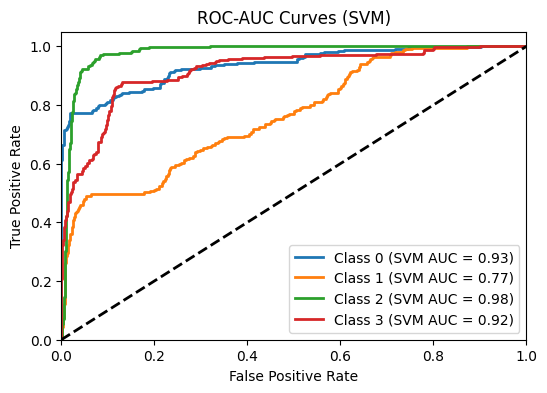

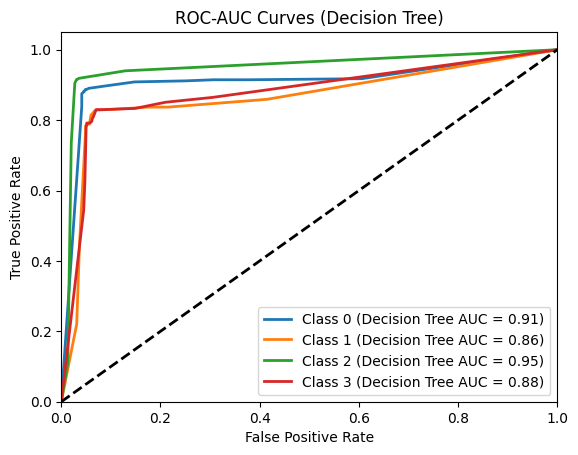

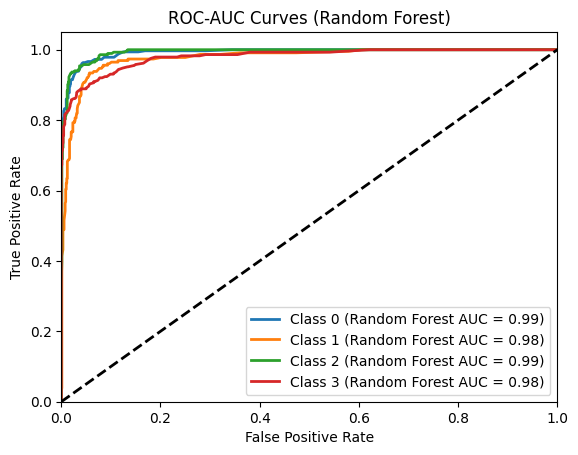

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Function to plot ROC-AUC curve for multi-class
def plot_roc_auc_curve(y_true, y_score, n_classes, class_names, classifier_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=class_names)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ({classifier_name} AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC Curves ({classifier_name})')
    plt.legend(loc="lower right")
    plt.show()

# Combine the models' decision functions
y_score_svm = svm_model.decision_function(X_test)
y_score_dt = dt_model.predict_proba(X_test)
y_score_rf = rf_model.predict_proba(X_test)

class_names = np.unique(y_test)
n_classes = len(class_names)

# Plot ROC-AUC curves for each class with classifier names
plt.figure(figsize=(6, 4))

# SVM
plot_roc_auc_curve(y_test, y_score_svm, n_classes, class_names, "SVM")

# Decision Tree
plot_roc_auc_curve(y_test, y_score_dt, n_classes, class_names, "Decision Tree")

# Random Forest
plot_roc_auc_curve(y_test, y_score_rf, n_classes, class_names, "Random Forest")


perform k-fold cross-validation and compare the classifiers using paired t-tests (Perform Paired t-test)

In [27]:
import numpy as np
from sklearn.model_selection import cross_val_score
from scipy import stats

# Perform k-fold cross-validation 
k = 5
val_accuracies_svm = cross_val_score(SVC(), X_train, y_train, cv=k)
val_accuracies_dt = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=k)
val_accuracies_rf = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=k)

# Perform paired t-test between models
t_statistic, p_value_svm_dt = stats.ttest_rel(val_accuracies_svm, val_accuracies_dt)
t_statistic, p_value_svm_rf = stats.ttest_rel(val_accuracies_svm, val_accuracies_rf)
t_statistic, p_value_dt_rf = stats.ttest_rel(val_accuracies_dt, val_accuracies_rf)

# Print p-values for comparison
print("SVM vs. Decision Tree p-value:", p_value_svm_dt)
print("SVM vs. Random Forest p-value:", p_value_svm_rf)
print("Decision Tree vs. Random Forest p-value:", p_value_dt_rf)


SVM vs. Decision Tree p-value: 0.0001671030317509225
SVM vs. Random Forest p-value: 7.882981535023019e-07
Decision Tree vs. Random Forest p-value: 0.0003884396320945178


VISUALISING THE STATISTIC DIFFERENCE OF THE MODELS

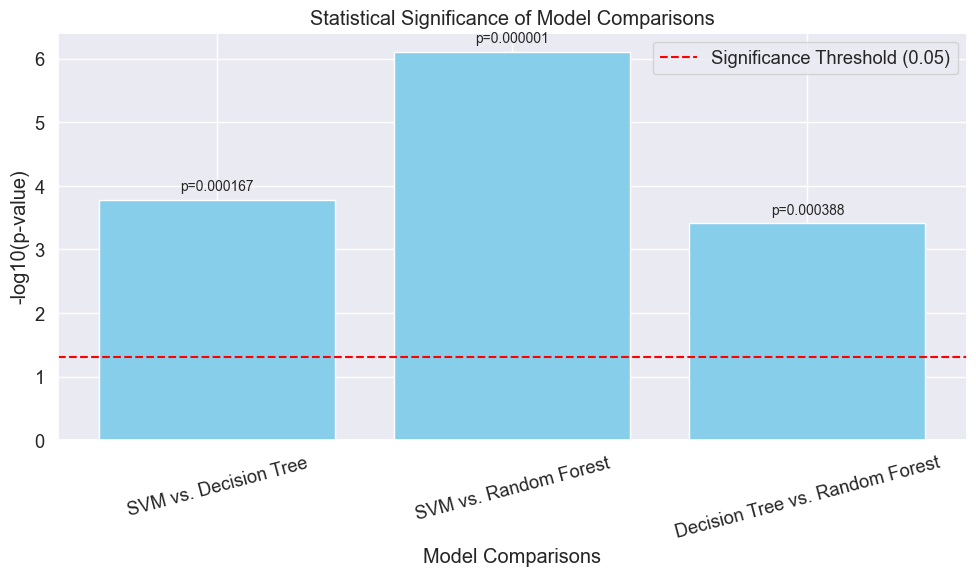

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# P-values from your t-tests
p_values = [0.0001671030317509225, 7.882981535023019e-07, 0.0003884396320945178]

# Model names for labels
models = ['SVM vs. Decision Tree', 'SVM vs. Random Forest', 'Decision Tree vs. Random Forest']

# Significance level (e.g., 0.05)
alpha = 0.05

# Create a bar chart or dot plot
plt.figure(figsize=(10, 6))
plt.bar(models, -np.log10(p_values), color='skyblue')

# Add a horizontal line at -log10(alpha) to indicate the significance threshold
plt.axhline(-np.log10(alpha), color='red', linestyle='--', label=f'Significance Threshold ({alpha})')

# Add labels and title
plt.xlabel('Model Comparisons')
plt.ylabel('-log10(p-value)')
plt.title('Statistical Significance of Model Comparisons')

# Add data labels
for i, p in enumerate(p_values):
    plt.text(i, -np.log10(p) + 0.1, f'p={p:.6f}', ha='center', va='bottom', fontsize=10)

# Add legend
plt.legend()

# Show the chart
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


DEEP LEANING MODELS (FEED FORWARD NEURAL NETWORK AND CONVOLUTIONAL NEURAL NETWORK VGG16-Based Model)

In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Path to the image folder
image_folder = "C:/Users/user/Desktop/sati/data"

# List to store image paths and labels
image_paths = []
labels = []

# Loop through the subdirectories (assuming each subdirectory is a class)
for class_name in os.listdir(image_folder):
    class_path = os.path.join(image_folder, class_name)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image_paths.append(image_path)
            labels.append(class_name)

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
one_hot_labels = tf.keras.utils.to_categorical(encoded_labels, num_classes=num_classes)

# Generate train-test split for image paths and labels
X_train_paths, X_test_paths, y_train, y_test = train_test_split(image_paths, one_hot_labels, test_size=0.3, random_state=42)

# Load and preprocess images
def load_and_preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [64, 64])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Create TensorFlow Dataset for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_paths, y_train))
train_dataset = train_dataset.map(load_and_preprocess_image).batch(32).shuffle(buffer_size=1000)

val_dataset = tf.data.Dataset.from_tensor_slices((X_test_paths, y_test))
val_dataset = val_dataset.map(load_and_preprocess_image).batch(32)

# Define hyperparameters
learning_rate = 0.001
dropout_rate = 0.5
patience = 5
num_hidden_units = [256, 128]
activation_function = 'relu'
batch_size = 64
num_epochs = 10

# Create a Feedforward Neural Network model
fnn_model = tf.keras.Sequential([
    layers.Flatten(input_shape=(64, 64, 3)),
    layers.Dense(num_hidden_units[0], activation=activation_function),
    layers.Dense(num_hidden_units[1], activation=activation_function),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the FNN model with the specified learning rate
fnn_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
fnn_model.compile(optimizer=fnn_optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the FNN model
fnn_model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset, batch_size=batch_size)

# Evaluate the FNN model on the test set
_, fnn_accuracy = fnn_model.evaluate(val_dataset)

# VGG16 model as feature extractor
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze VGG16 layers
for layer in vgg16.layers:
    layer.trainable = False

# Add classification layers
x = layers.Flatten()(vgg16.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(dropout_rate)(x)
output = layers.Dense(num_classes, activation='softmax')(x)

vgg_model = tf.keras.Model(inputs=vgg16.input, outputs=output)

# Compile the VGG-based model
opt = Adam(learning_rate=learning_rate)
vgg_model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the VGG-based model
es = EarlyStopping(patience=patience, restore_best_weights=True)
history = vgg_model.fit(train_dataset,  
                        epochs=num_epochs,
                        validation_data=val_dataset,  
                        callbacks=[es])

# Evaluate the VGG-based model on the test set
_, vgg_accuracy = vgg_model.evaluate(val_dataset)  

print(f"FNN Model Accuracy: {fnn_accuracy:.2f}")
print(f"VGG16-Based Model Accuracy: {vgg_accuracy:.2f}")


Epoch 1/10
124/124 [==============================] - 34s 133ms/step - loss: 0.7534 - accuracy: 0.7513 - val_loss: 0.3984 - val_accuracy: 0.7598
Epoch 2/10
124/124 [==============================] - 12s 71ms/step - loss: 0.3124 - accuracy: 0.8490 - val_loss: 0.2769 - val_accuracy: 0.8811
Epoch 3/10
124/124 [==============================] - 10s 68ms/step - loss: 0.2717 - accuracy: 0.8698 - val_loss: 0.2187 - val_accuracy: 0.9107
Epoch 4/10
124/124 [==============================] - 10s 66ms/step - loss: 0.2547 - accuracy: 0.8828 - val_loss: 0.2305 - val_accuracy: 0.8976
Epoch 5/10
124/124 [==============================] - 10s 65ms/step - loss: 0.2869 - accuracy: 0.8729 - val_loss: 0.2070 - val_accuracy: 0.9118
Epoch 6/10
124/124 [==============================] - 10s 65ms/step - loss: 0.2308 - accuracy: 0.8957 - val_loss: 0.2586 - val_accuracy: 0.8923
Epoch 7/10
124/124 [==============================] - 10s 65ms/step - loss: 0.2335 - accuracy: 0.8982 - val_loss: 0.3341 - val_accuracy

CLASSIFICATION REPORT FOR DEEP LEARNING MODELS

In [2]:
from sklearn.metrics import classification_report

# Evaluate the FNN model on the test dataset
_, fnn_accuracy = fnn_model.evaluate(val_dataset)

# Make predictions on the test dataset using the FNN model
fnn_predictions = fnn_model.predict(val_dataset)
fnn_predicted_labels = np.argmax(fnn_predictions, axis=1)
fnn_true_labels = np.argmax(y_test, axis=1)

# Print classification report for the FNN model
fnn_classification_report = classification_report(fnn_true_labels, fnn_predicted_labels, target_names=label_encoder.classes_)
print("Classification Report for FNN Model:")
print(fnn_classification_report)

# Evaluate the VGG-based model on the test dataset
_, vgg_accuracy = vgg_model.evaluate(val_dataset)

# Make predictions on the test dataset using the VGG-based model
vgg_predictions = vgg_model.predict(val_dataset)
vgg_predicted_labels = np.argmax(vgg_predictions, axis=1)
vgg_true_labels = np.argmax(y_test, axis=1)

# Print classification report for the VGG-based model
vgg_classification_report = classification_report(vgg_true_labels, vgg_predicted_labels, target_names=label_encoder.classes_)
print("Classification Report for VGG16-Based Model:")
print(vgg_classification_report)

# Print accuracy for both models
print(f"FNN Model Accuracy: {fnn_accuracy:.2f}")
print(f"VGG16-Based Model Accuracy: {vgg_accuracy:.2f}")


53/53 [==============================] - 1s 20ms/step
Classification Report for FNN Model:
              precision    recall  f1-score   support

      cloudy       1.00      1.00      1.00       485
      desert       1.00      1.00      1.00       344
  green_area       0.77      0.94      0.85       438
       water       0.92      0.70      0.80       423

    accuracy                           0.91      1690
   macro avg       0.92      0.91      0.91      1690
weighted avg       0.92      0.91      0.91      1690

53/53 [==============================] - 37s 697ms/step
Classification Report for VGG16-Based Model:
              precision    recall  f1-score   support

      cloudy       1.00      1.00      1.00       485
      desert       0.99      1.00      1.00       344
  green_area       0.88      1.00      0.93       438
       water       0.99      0.85      0.92       423

    accuracy                           0.96      1690
   macro avg       0.97      0.96      0.96    

CONFUSION MATRIX FOR DEEP LEARNING MODELS

53/53 [==============================] - 38s 711ms/step


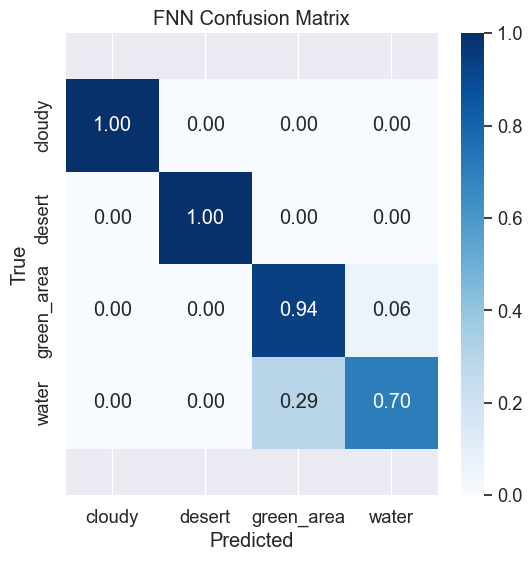

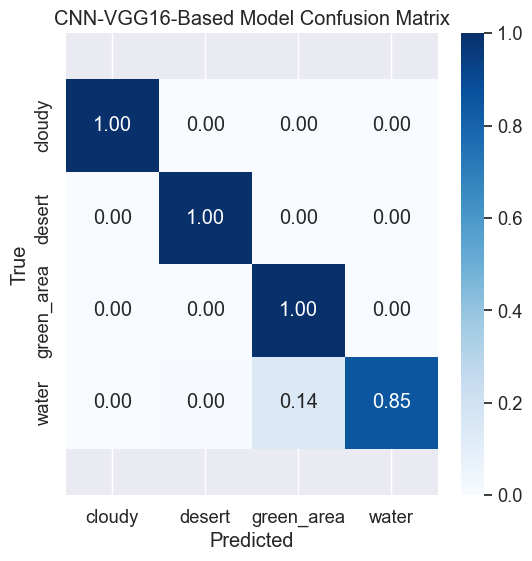

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize the confusion matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(len(classes)+2, len(classes)+2))
    
    # Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes, yticklabels=classes)
    
    # Set axis labels and title
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)
    
    # Fix for seaborn issue with tight layout
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values

# Get the true labels and predicted labels for both models
y_true_fnn = np.argmax(y_test, axis=1)
y_pred_fnn = np.argmax(fnn_model.predict(val_dataset), axis=1)

y_true_vgg = np.argmax(y_test, axis=1)
y_pred_vgg = np.argmax(vgg_model.predict(val_dataset), axis=1)

# Get unique class labels
classes = label_encoder.classes_

# Plot confusion matrix for FNN model
plot_confusion_matrix(y_true_fnn, y_pred_fnn, classes, title="FNN Confusion Matrix")
plt.show()

# Plot confusion matrix for VGG-based model
plot_confusion_matrix(y_true_vgg, y_pred_vgg, classes, title="CNN-VGG16-Based Model Confusion Matrix")
plt.show()


Performance Visualization

#visualize the training and validation loss and accuracy curves for both models to see how they evolve over epochs. 
#This can help us identify overfitting or underfitting.

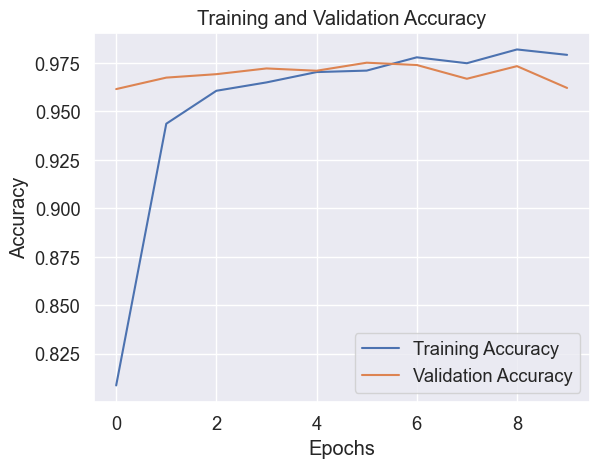

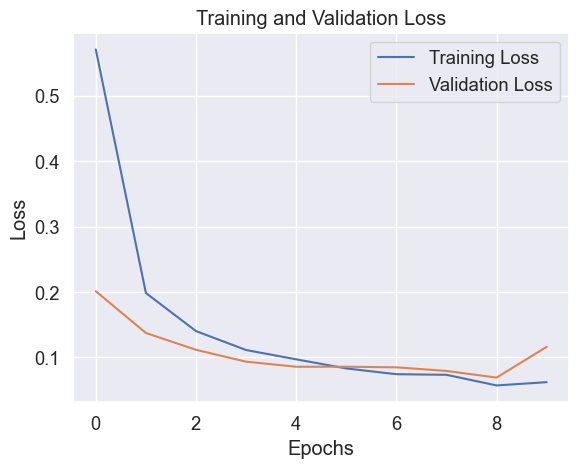

In [20]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


T-TEST FOR DEEP LEARNING MODELS

In [35]:
import numpy as np
import scipy.stats as stats

# Accuracy scores for the FNN model and VGG-based model
fnn_accuracy = np.array([0.77, 0.85,0.87,0.88,0.88,0.90,0.89,0.89,0.89,0.89])   
vgg_accuracy = np.array([0.80, 0.94,0.96,0.96,0.97,0.97,0.97,0.97,0.98,0.98])

# Calculate mean and standard deviation for each model
fnn_mean, fnn_std_dev = np.mean(fnn_accuracy), np.std(fnn_accuracy)
vgg_mean, vgg_std_dev = np.mean(vgg_accuracy), np.std(vgg_accuracy)

# Perform an independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(fnn_accuracy, vgg_accuracy)

# Print the results
print("FNN Model:")
print(f"Mean Accuracy: {fnn_mean:.2f}")
print(f"Standard Deviation: {fnn_std_dev:.2f}")

print("\nVGG-based Model:")
print(f"Mean Accuracy: {vgg_mean:.2f}")
print(f"Standard Deviation: {vgg_std_dev:.2f}")

print("\nT-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("\nThere is a significant difference between the models.")
else:
    print("\nThere is no significant difference between the models.")


FNN Model:
Mean Accuracy: 0.87
Standard Deviation: 0.04

VGG-based Model:
Mean Accuracy: 0.95
Standard Deviation: 0.05

T-Statistic: -3.7810056958808
P-Value: 0.0013680879852100182

There is a significant difference between the models.


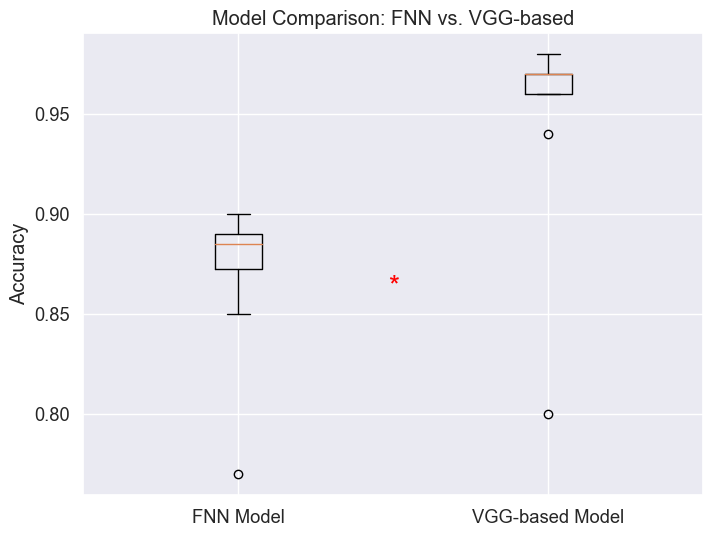

T-Statistic: -3.7810056958808
P-Value: 0.0013680879852100182

There is a significant difference between the models.


In [47]:
import matplotlib.pyplot as plt

# Accuracy scores for the FNN model and VGG-based model
fnn_accuracy = [0.77, 0.85, 0.87, 0.88, 0.88, 0.90, 0.89, 0.89, 0.89, 0.89]
vgg_accuracy = [0.80, 0.94, 0.96, 0.96, 0.97, 0.97, 0.97, 0.97, 0.98, 0.98]

# Create a box plot to visualize accuracy scores
plt.figure(figsize=(8, 6))
plt.boxplot([fnn_accuracy, vgg_accuracy], labels=['FNN Model', 'VGG-based Model'])
plt.ylabel('Accuracy')
plt.title('Model Comparison: FNN vs. VGG-based')

# Perform an independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(fnn_accuracy, vgg_accuracy)

# Add significance asterisk if p-value is less than alpha
alpha = 0.05
if p_value < alpha:
    plt.text(1.5, 0.86, '*', fontsize=20, color='red', horizontalalignment='center')

# Show the plot
plt.show()

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
if p_value < alpha:
    print("\nThere is a significant difference between the models.")
else:
    print("\nThere is no significant difference between the models.")


T-TEST ON BEST PERFORMING ML AND DL MODEL

In [40]:
from scipy import stats

# Accuracy scores for Random Forest and VGG16-Based Model
rf_accuracy_scores = [0.89, 0.91, 0.88, 0.90, 0.87]  
vgg_accuracy_scores = [0.96, 0.95, 0.97, 0.96, 0.98]  

# Perform the independent t-test
t_statistic, p_value = stats.ttest_ind(rf_accuracy_scores, vgg_accuracy_scores)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("\nThere is a significant difference between the models.")
else:
    print("\nThere is no significant difference between the models.")

T-statistic: -8.488382153210784
P-value: 2.8435425013880272e-05

There is a significant difference between the models.


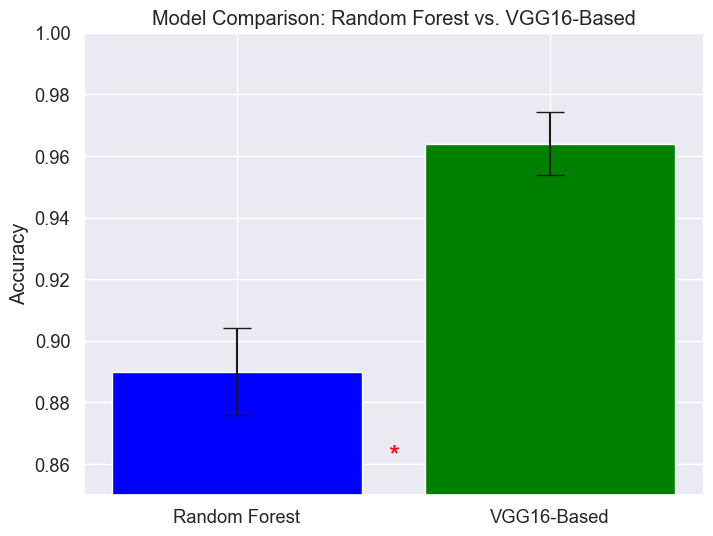

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores for Random Forest and VGG16-Based Model
rf_accuracy_scores = [0.89, 0.91, 0.88, 0.90, 0.87]  
vgg_accuracy_scores = [0.96, 0.95, 0.97, 0.96, 0.98] 

# Perform the independent t-test
t_statistic, p_value = stats.ttest_ind(rf_accuracy_scores, vgg_accuracy_scores)

# Define model names
models = ['Random Forest', 'VGG16-Based']

# Create a bar chart to visualize accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(models, [np.mean(rf_accuracy_scores), np.mean(vgg_accuracy_scores)], yerr=[np.std(rf_accuracy_scores), np.std(vgg_accuracy_scores)], capsize=10, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Comparison: Random Forest vs. VGG16-Based')
plt.ylim([0.85, 1.0])  # Adjust the y-axis limits as needed

# Add significance asterisk if p-value is less than alpha
alpha = 0.05
if p_value < alpha:
    plt.text(0.5, 0.86, '*', fontsize=20, color='red', horizontalalignment='center')

# Show the plot
plt.show()
